<a href="https://colab.research.google.com/github/sovank/learn-linux/blob/main/Day_101_High_Availability_and_Replication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q1. DBMS Class 7 Assignment 1

In this assignment, you are going to set up database replication between a master-server and a replica-server. Replication is the process of copying and maintaining database updates from one database (the master) to another (the replica). Once replication is set up, any changes made to the master will automatically be copied to the replica.You are logged in to the master-server, where a MySQL server is already running. There is also another server provided to you, known as the replica-server, where you will set up the replication process. Your job is to configure replication so that the replica-server can mirror the master-server database.Step-by-Step Breakdown of Tasks:


NOTE:

If you are facing any permission issues using any of the below user or replica, make sure to use root user using below command and password for sudo is **user@123!**

**sudo mysql -u root**

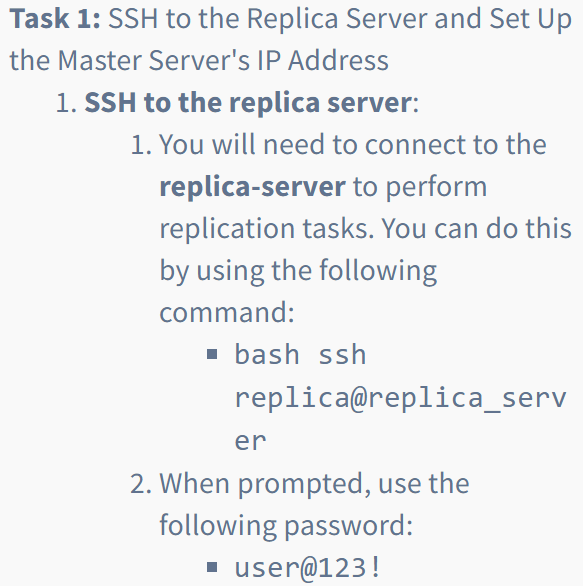

In [ ]:
ssh replica@replica_server
user@123!

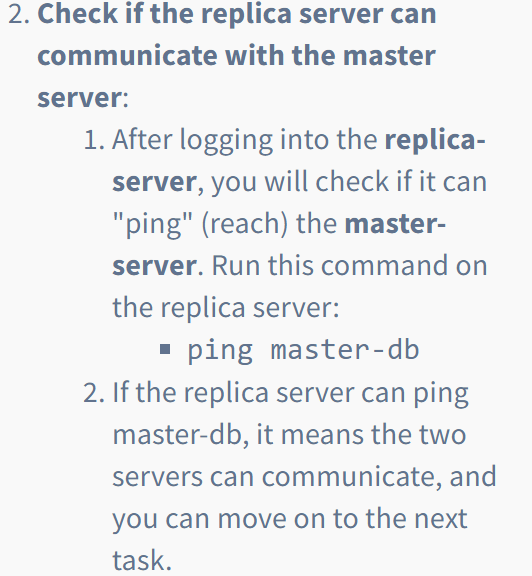

In [ ]:
ping master-db

64 bytes from master-db (172.20.0.5): icmp_seq=3 ttl=64 time=0.053 ms
64 bytes from master-db (172.20.0.5): icmp_seq=4 ttl=64 time=0.054 ms
64 bytes from master-db (172.20.0.5): icmp_seq=5 ttl=64 time=0.047 ms
64 bytes from master-db (172.20.0.5): icmp_seq=6 ttl=64 time=0.047 ms
64 bytes from master-db (172.20.0.5): icmp_seq=7 ttl=64 time=0.046 ms
64 bytes from master-db (172.20.0.5): icmp_seq=8 ttl=64 time=0.046 ms
64 bytes from master-db (172.20.0.5): icmp_seq=9 ttl=64 time=0.052 ms
64 bytes from master-db (172.20.0.5): icmp_seq=10 ttl=64 time=0.045 ms
64 bytes from master-db (172.20.0.5): icmp_seq=11 ttl=64 time=0.048 ms

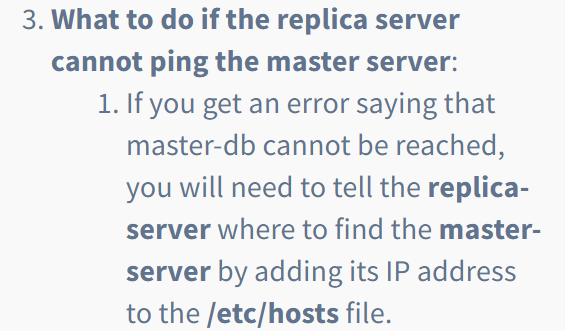

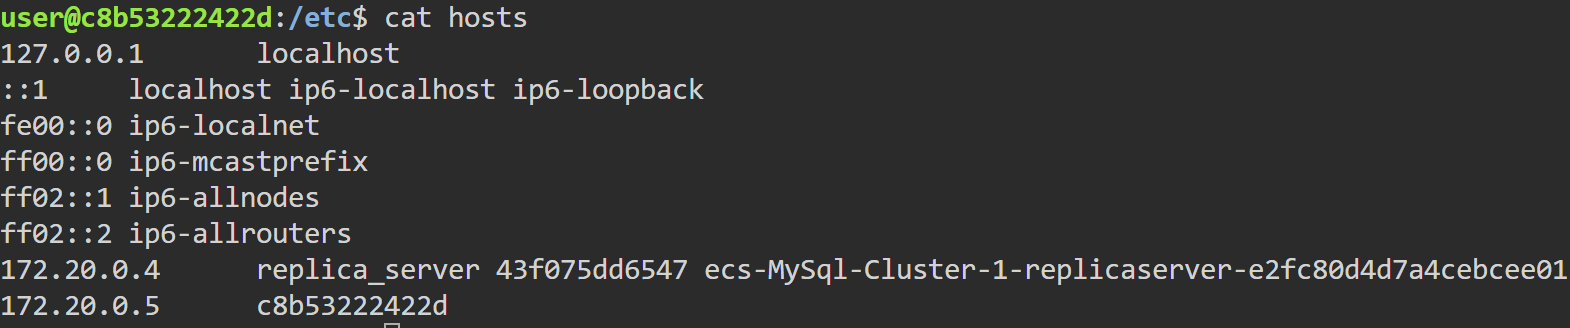



---



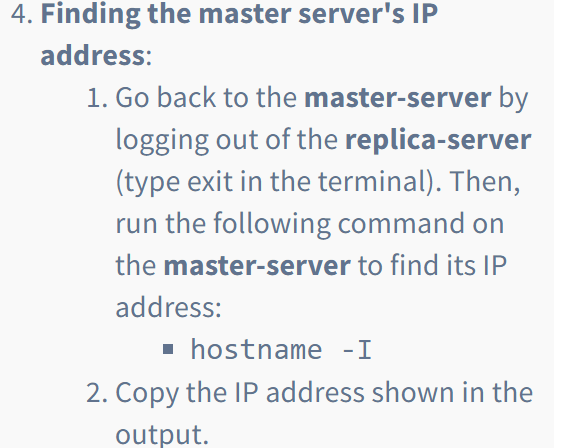

In [ ]:
hostname -I --> 172.20.0.5



---



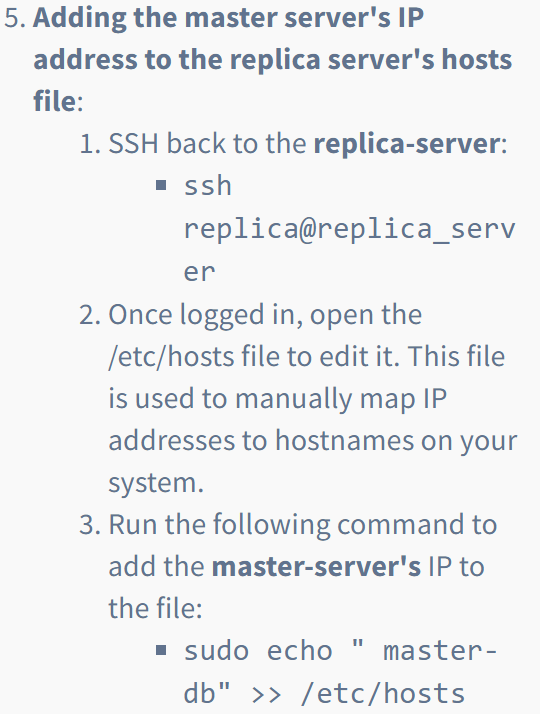

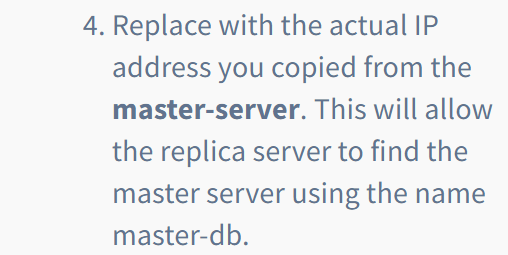

In [ ]:
sudo echo "172.20.0.5 master-db" >> /etc/hosts



---



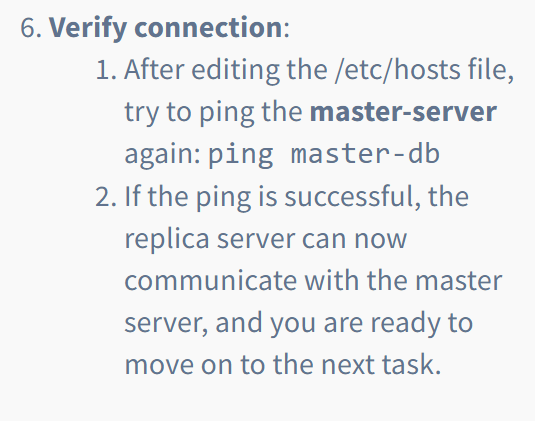

In [ ]:
ping master-db


PING master-db (172.20.0.5) 56(84) bytes of data.
64 bytes from master-db (172.20.0.5): icmp_seq=1 ttl=64 time=0.043 ms
64 bytes from master-db (172.20.0.5): icmp_seq=2 ttl=64 time=0.049 ms
64 bytes from master-db (172.20.0.5): icmp_seq=3 ttl=64 time=0.056 ms
64 bytes from master-db (172.20.0.5): icmp_seq=4 ttl=64 time=0.051 ms

\



---



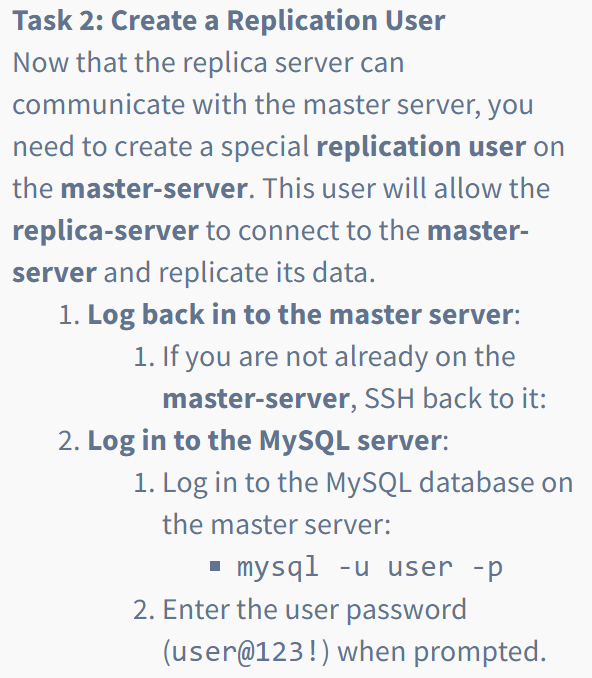

In [ ]:
mysql -u user -p
user@123!


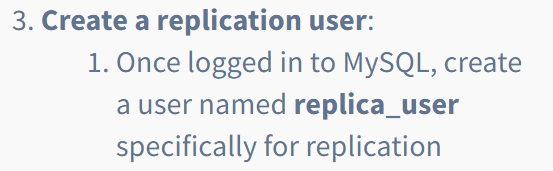

In [ ]:
create user 'replica_user'@'%' identified by 'user@123!';



---



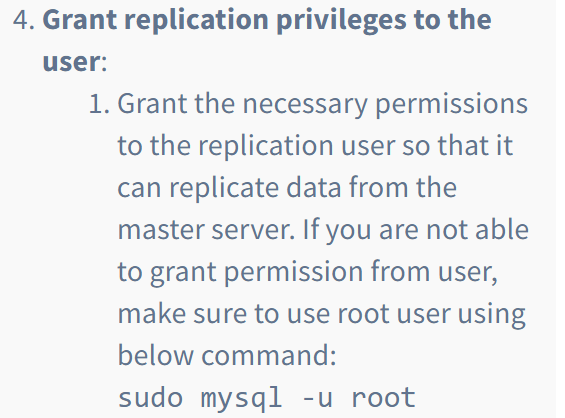

In [ ]:
grant replication slave on *.* to 'replica_user'@'%';

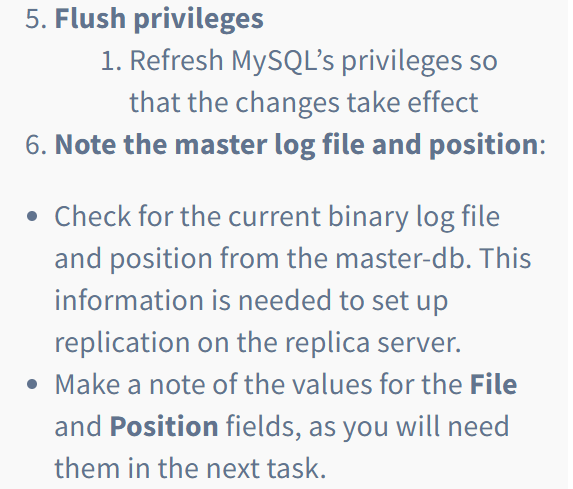

In [ ]:
flush privileges;


mysql> show MASTER status;
+---------------+----------+--------------+------------------+-------------------+
| File          | Position | Binlog_Do_DB | Binlog_Ignore_DB | Executed_Gtid_Set |
+---------------+----------+--------------+------------------+-------------------+
| binlog.000004 |     1102 |              |                  |                   |
+---------------+----------+--------------+------------------+-------------------+



---



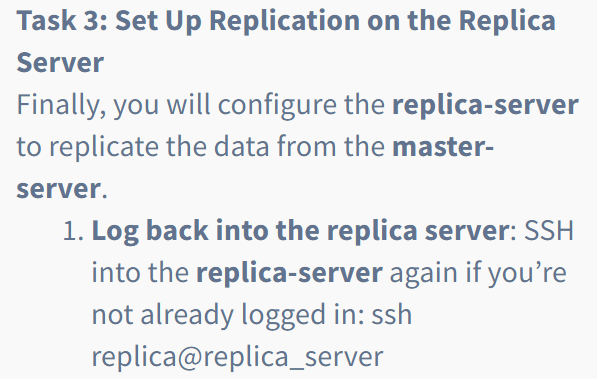

In [ ]:
ssh replica@replica_server

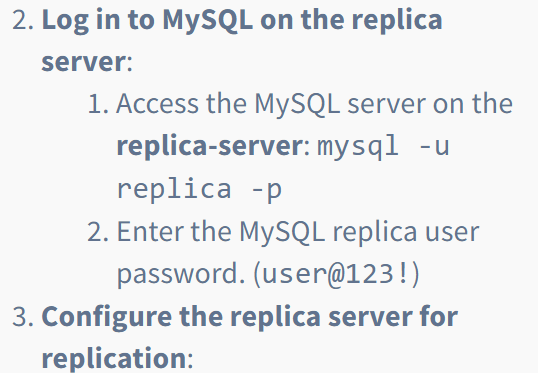

In [ ]:
sudo vi /etc/mysql/mysql.conf.d/mysqld.cnf

# Edit MySQL Configuration

# Master Server

Open the MySQL configuration file:
sudo vi /etc/mysql/mysql.conf.d/mysqld.cnf
Set Configuration Values
Add or modify the following lines:
[mysqld]
bind-address = 0.0.0.0
server-id = 1 # Setting server-id = 1 uniquely identifies the master server.
log_bin = /var/log/mysql/mysql-bin.log
--------------------------------------------> exit; sudo service mysql restart

# Replica Server
sudo vi /etc/mysql/mysql.conf.d/mysqld.cnf
[mysqld]
bind-address = 0.0.0.0
server-id = 2 # Use a unique server-id value for the replica server, here set as 2.
--------------------------------------------> exit; sudo service mysql restart

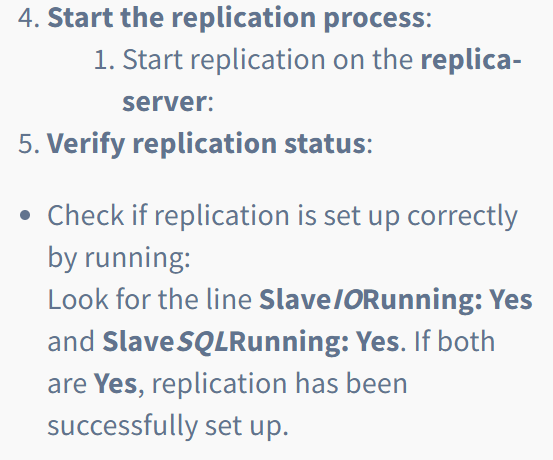

In [ ]:
ssh replica@replica_server

Access MySQL as root on the replica server: mysql -u root -p
Enter the password user@123!.

CHANGE MASTER TO
  MASTER_HOST='master-db',
  MASTER_USER='replica_user',
  MASTER_PASSWORD='user@123!',
  MASTER_LOG_FILE='/var/log/mysql/mysql-bin.log',
  MASTER_LOG_POS=1102;

# Start Replication
# Start the replication process on the replica:
start SLAVE;

# Verify Replication Status
# Run this command to check if replication is active:
show SLAVE STATUS\G;
# Ensure Slave_IO_Running and Slave_SQL_Running are both set to Yes, indicating successful replication.